# \[Demo\] Lession 1: Data Analysis with Python

This demo aims to give you an introduction of simple things that you can do to analyze the data with Python. Regularly, data analysis includes these steps:

    (1) Loading/Importing data: from local or online
    (2) Understanding the data: show the data, check data type
    (3) Data wrangling
    (4) Descriptive statistics
    (5) Analytical statistics
    (6) Exporting data

Normally, after the data wrangling step, we should export the processed data for future uses. Data visualization is integrated in step (4) and (5). <br><br>
In this demo, we walk through two topics:
#### 1. Top 20 programming languages according to TIOBE Index
- TIOBE Index is an organization that has created an index for programming languages and tracks the change of that index, every month.
- Loading data from a package, pre-process data, visualize data

To learn more: [visit this blog](https://towardsdatascience.com/visualize-programming-language-popularity-using-tiobeindexpy-f82c5a96400d)

#### 2. Data of medications from ThongTinThuoc
- Crawl data from ThongTinThuoc
- Explore the data type


## 1. Top 20 programming languages

Purpose: Plot a chart of top 20 programming languages based on their ratings

In [1]:
# IMPORT DEPENDENCIES
from tiobeindexpy import tiobeindexpy as tbpy
import seaborn as sns

### Load data from the package

In [2]:
top_20 = tbpy.top_20()
# Data type
print('Type of the data: %s' % type(top_20))
top_20.head() # Show the first 5 rows in the data

Type of the data: <class 'pandas.core.frame.DataFrame'>


,Nov 2019,Nov 2018,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.246%,-0.50%
1,2,2,NaN,C,16.037%,+1.64%
2,3,4,NaN,Python,9.842%,+2.16%
3,4,3,NaN,C++,5.605%,-2.68%
4,5,6,NaN,C#,4.316%,+0.36%


In [3]:
top_20 # Show all data

,Nov 2019,Nov 2018,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,16.246%,-0.50%
1,2,2,NaN,C,16.037%,+1.64%
2,3,4,NaN,Python,9.842%,+2.16%
3,4,3,NaN,C++,5.605%,-2.68%
4,5,6,NaN,C#,4.316%,+0.36%
5,6,5,NaN,Visual Basic .NET,4.229%,-2.26%
6,7,7,NaN,JavaScript,1.929%,-0.73%
7,8,8,NaN,PHP,1.720%,-0.66%
8,9,9,NaN,SQL,1.690%,-0.15%
9,10,12,NaN,Swift,1.653%,+0.20%


### Data pre-processing

In [4]:
# Observe data type of two two interest fields: "Programming Language" and "Ratings"
print("Data type of Programming Language column: %s" % type(top_20["Programming Language"][0]))
print("Data type of Ratings: %s" % type(top_20["Ratings"][0]))

Data type of Programming Language column: <class 'str'>
Data type of Ratings: <class 'str'>


Ratings should be ***float*** so we need to strip ***%*** and change the data type to float.

In [5]:
top_20["Ratings"] = top_20["Ratings"].str.strip("%").astype("float")
# Re-check the data type
type(top_20["Ratings"][0])

numpy.float64

### Data visualization

Text(0.5, 1.0, 'November 2019 - Programming Popularity')

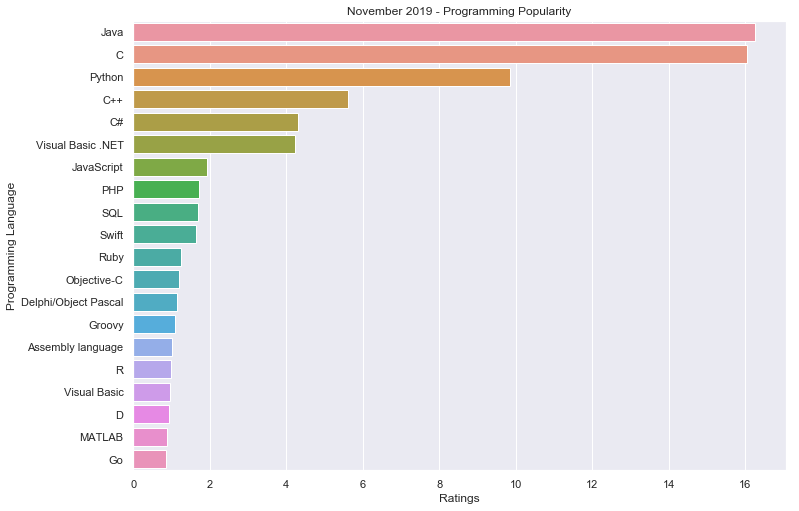

In [6]:
sns.set(style = "whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot('Ratings', 'Programming Language', data = top_20).set_title('November 2019 - Programming Popularity')

## 2. Data of medications from ThongTinThuoc

In [7]:
# IMPORT DEPENDENCIES
import pandas as pd
import matplotlib.pyplot as plt

from thongtinthuoc import Thongtinthuoc
T3 = Thongtinthuoc(']sFwDb8;$Zp0TpK3:k@JIZe0C=7BO7')

### Load data

In [8]:
drugs = ['Insulin', 'Pramlintide', 'Acarbose', 'Miglitol', 'Metformin', 'Glipizide', 'Gliclazide']
results = []
for drug in drugs:
    drug_info = T3.search('bietduoc', drug)
    for bietduoc in drug_info.data:
        result = {}
        try:
            bietduoc_set = bietduoc.bietduochoatchat_set[0]
            for k, v in bietduoc_set.items():
                result[k] = v
        except: continue
        try: result['ctysx_name'] = bietduoc.ctysx_name
        except: result['ctysx_name'] = ""
        try: result['nuoc_sx_id'] = bietduoc.nuoc_sx_id
        except: result['nuoc_sx_id'] = ""
        results.append(result)

In [9]:
data = pd.io.json.json_normalize(results)
interested_fields = ['hoatchat_name', 'ham_luong', 'don_vi', 'ctysx_name', 'nuoc_sx_id']
data = data[interested_fields]
data.columns = ["Name", "Content", "Unit", 'Manufacturer', 'Country']
data.head()

,Name,Content,Unit,Manufacturer,Country
0,INSULIN HUMAN,100,đơn vị insulin/ml,[Eli Lilly & Company],USA
1,INSULIN GLARGINE,100,IU,[Wockhardt Limited],IND
2,INSULIN GLARGINE,300,IU,[sanofi-aventis Deutschland GmbH],DEU
3,INSULIN HUMAN,8,42005.0,,
4,INSULIN HUMAN,400,IU,"[M.J. Biopharm Pvt., Ltd]",IND


### Analysis

#### 1. How many medications were queried?

In [10]:
len(data)

64

#### 2. How many products for each active ingredient?

In [11]:
data["Name"].value_counts()

ACARBOSE                   12
GLIPIZIDE                  12
METFORMIN HYDROCHLORIDE    11
GLICLAZIDE                 10
INSULIN GLARGINE            5
INSULIN HUMAN               4
MIGLITOL                    3
PRAMLINTIDE ACETATE         3
INSULIN LISPRO              1
INSULIN ASPART              1
INSULIN GLULISINE           1
METFORMIN                   1
Name: Name, dtype: int64

#### 3. How many medications have manufacturer information?

In [12]:
manufacturer = data[data["Manufacturer"]!=""]
len(manufacturer)

29

#### 4. How many products of each manufacturer?

In [13]:
manufacturer["Manufacturer"].value_counts()

[Pharbaco, Công ty cổ phần dược phẩm trung ương 1 - Pharbaco.]    3
[sanofi-aventis Deutschland GmbH]                                 3
[Dược phẩm 3/2., Công ty cổ phần Dược phẩm 3/2.]                  3
[Dược phẩm TV. Pharm, Công ty cổ phần dược phẩm TV. Pharm]        2
[Tipharco, Công ty cổ phần dược phẩm Tipharco]                    2
[Dược phẩm Euvipharm, Công ty cổ phần Dược phẩm Euvipharm]        2
[Novo Nordisk A/S]                                                1
[Công ty TNHH United Pharma Việt Nam]                             1
[NIC Pharma, Công ty TNHH SX-TM dược phẩm NIC (NIC Pharma)]       1
[Vacopharm, Công ty cổ phần dược Vacopharm]                       1
[Công ty TNHH Nam Dược]                                           1
[Vacopharm, Công ty cổ phần dược Vacopharm.]                      1
[Stada - Việt Nam, Công ty TNHH LD Stada - Việt Nam]              1
[Wockhardt Limited]                                               1
[Domesco, Công ty cổ phần xuất nhập khẩu y tế Do

#### 5. Country of origin

In [14]:
origin = pd.DataFrame(manufacturer["Country"].value_counts()).reset_index()
origin.columns = ["Country", "Count"]
origin

,Country,Count
0,VNM,21
1,DEU,3
2,IND,2
3,TWN,1
4,USA,1
5,DNK,1


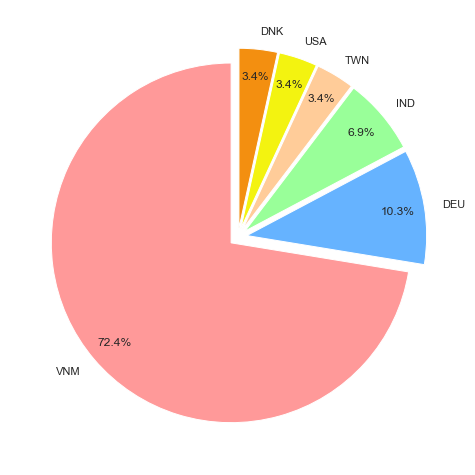

In [18]:
# Let's visualize these number with pie chart
labels = origin.Country
sizes = origin.Count
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', "#F3F310", "#F38F10"]
explode = (0.05,0.05,0.05,0.05, 0.05, 0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85, explode = explode)
plt.show()